In [121]:
%matplotlib notebook
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import gmaps
import os
import json
# Import API key
from config import g_key


In [122]:
df=pd.read_csv("final_311_census.csv")
df.head()

,CREATED_ON,CREATE_DATE,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,X,Y,location,ZIP,Household Income,Population,Median Age,Per Capita Income,Poverty Count
0,2015-04-20T08:38:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.015178,40.392419,"40.3924186,-80.01517829999999",15226,54441,13632,39.5,29870,1329
1,2015-04-20T08:42:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.018696,40.400007,"40.4000074,-80.0186958",15226,54441,13632,39.5,29870,1329
2,2015-04-20T08:43:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.016089,40.399618,"40.399617799999994,-80.01608940000001",15226,54441,13632,39.5,29870,1329
3,2015-04-20T09:15:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.007267,40.383212,"40.3832124,-80.0072673",15226,54441,13632,39.5,29870,1329
4,2015-04-20T09:16:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.009981,40.384611,"40.3846107,-80.0099811",15226,54441,13632,39.5,29870,1329


In [123]:
df['month'] = pd.DatetimeIndex(df['CREATE_DATE']).month
df

,CREATED_ON,CREATE_DATE,REQUEST_TYPE,REQUEST_ORIGIN,DEPARTMENT,NEIGHBORHOOD,X,Y,location,ZIP,Household Income,Population,Median Age,Per Capita Income,Poverty Count,month
0,2015-04-20T08:38:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.015178,40.392419,"40.3924186,-80.01517829999999",15226,54441,13632,39.5,29870,1329,4
1,2015-04-20T08:42:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.018696,40.400007,"40.4000074,-80.0186958",15226,54441,13632,39.5,29870,1329,4
2,2015-04-20T08:43:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.016089,40.399618,"40.399617799999994,-80.01608940000001",15226,54441,13632,39.5,29870,1329,4
3,2015-04-20T09:15:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.007267,40.383212,"40.3832124,-80.0072673",15226,54441,13632,39.5,29870,1329,4
4,2015-04-20T09:16:00,2015-04,Potholes,Call Center,DPW - Street Maintenance,Brookline,-80.009981,40.384611,"40.3846107,-80.0099811",15226,54441,13632,39.5,29870,1329,4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
22408,2018-01-30T16:28:00,2018-01,Potholes,Call Center,DPW - Street Maintenance,Squirrel Hill South,-79.925185,40.423677,"40.42367720000001,-79.9251852",15207,44894,12075,40.1,25058,2221,1
22409,2018-02-02T15:36:00,2018-02,Potholes,Call Center,DPW - Street Maintenance,Squirrel Hill South,-79.925185,40.423677,"40.42367720000001,-79.9251852",15207,44894,12075,40.1,25058,2221,2
22410,2019-02-11T09:14:00,2019-02,Snow/Ice removal,Call Center,DPW - Street Maintenance,Squirrel Hill South,-79.949334,40.428703,"40.42870294,-79.94933354",15207,44894,12075,40.1,25058,2221,2
22411,2018-02-23T16:03:00,2018-02,Potholes,Call Center,DPW - Street Maintenance,South Side Slopes,-79.975504,40.424848,"40.42484843,-79.97550428",15209,55248,12225,47.0,33908,1456,2


In [124]:
# bins = [0, 30000, 60000, 100000, 500000]

# # Create the names for the four bins
group_names = ["<30K", "30 to 60K", "60 to 100K", ">100K"]

In [125]:
# df["Income Category"] = pd.cut(df["Household Income"], bins, labels=group_names)
# df

In [126]:
# df = df.groupby("Income Category")
# df.max()

In [127]:
df = df.groupby(["month"]).size().reset_index(name='count')
df

,month,count
0,1,2872
1,2,2437
2,3,1722
3,4,1762
4,5,2567
5,6,2337
6,7,2287
7,8,1996
8,9,1329
9,10,1022


In [128]:
#CREATE_DATE=df["CREATE_DATE"]
month=df["month"]

In [129]:
#y_axis = np.arange(len(month))
y_axis=df["count"]

<IPython.core.display.Javascript object>


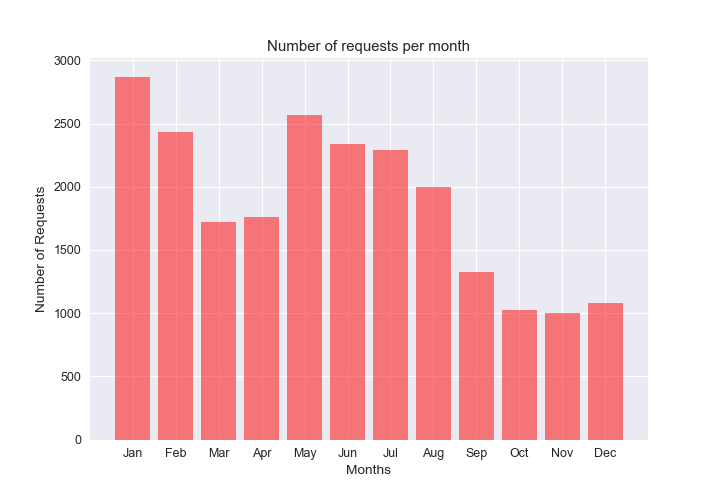

<BarContainer object of 12 artists>

In [130]:
plt.bar(month, y_axis, color='r', alpha=0.5, align="center")

In [131]:
tick_locations = [value for value in month]
plt.xticks(tick_locations, ["Jan", "Feb", "Mar", "Apr", "May","Jun","Jul","Aug","Sep","Oct","Nov","Dec"])

([<matplotlib.axis.XTick at 0x2192aa39e48>,
 <a list of 12 Text xticklabel objects>)

In [132]:
plt.title("Number of requests per month")
plt.xlabel("Months")
plt.ylabel("Number of Requests")

Text(0, 0.5, 'Number of Requests')

In [133]:
import seaborn as sns
plt.style.use('seaborn')